In [10]:
models = [i for i in ["trained_iris_model_11_14", "trained_iris_model_8_5", "trained_iris_model_5_11_8", "trained_iris_model_10", "trained_iris_model_big"]]
executable_path = "inference/.stack-work/dist/ab060f89/build/inference-exe/inference-exe.exe"

In [11]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
data = "iris_generated_unlab.csv"
X = np.array(pd.read_csv(data))
X.shape

(20150, 4)

In [18]:
from subprocess import run
from os import getcwd

print(getcwd())

c:\Users\santr\My Drive (santripta.sharma_ug24@ashoka.edu.in)\Academic Work\Sem6\FuncProg\Proj\src


In [27]:
mses = []

for model in models:
	with open("models/" + model + ".pkl", "rb") as f:
		ffn = pickle.load(f)
	
	actual = ffn.predict_proba(X)
	
	res = run([executable_path, "weights/" + model + ".mdl", data], capture_output = True)
	out = str(res.stdout)
	probabilities = out.split(":")[1].split("Predicted")[0].replace("\\r", "").replace("\\n", "")
	mat = np.array(eval(probabilities))

	mse = np.mean((actual.flatten() - mat.flatten()) ** 2)
	print(mse)
	mses.append(mse)

c:\Users\santr\My Drive (santripta.sharma_ug24@ashoka.edu.in)\Academic Work\Sem6\FuncProg\Proj\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


3.3581349838680596e-32


c:\Users\santr\My Drive (santripta.sharma_ug24@ashoka.edu.in)\Academic Work\Sem6\FuncProg\Proj\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


1.694815191792623e-32


c:\Users\santr\My Drive (santripta.sharma_ug24@ashoka.edu.in)\Academic Work\Sem6\FuncProg\Proj\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


3.8207970642142896e-32


c:\Users\santr\My Drive (santripta.sharma_ug24@ashoka.edu.in)\Academic Work\Sem6\FuncProg\Proj\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


1.986788939929278e-32


c:\Users\santr\My Drive (santripta.sharma_ug24@ashoka.edu.in)\Academic Work\Sem6\FuncProg\Proj\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


1.0205604707571506e-30


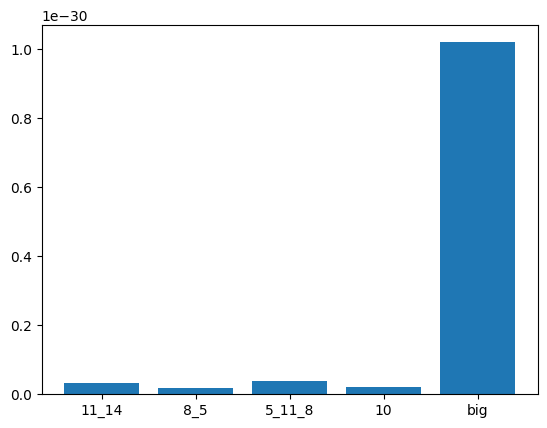

In [28]:
plt.bar(["_".join(m.split("_")[3:]) for m in models], mses)
plt.savefig("mse.png")